In [1]:
import pandas as pd
import pickle
inputDir = "/home/onimem/work/Open_world/NBA/Graph"
outputDir = "/home/onimem/work/Open_world/NBA/Model"

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from subprocess import check_output
print(check_output(["ls", inputDir]).decode("utf8"))

nba.graph



In [2]:
with open(inputDir + '/nba.graph', mode='rb') as f:
    graph = pickle.load(f)

In [3]:
# データ構造

YEAR = 1950
NAME = 'Curly Armstrong'

print("num of years : ", len(graph))
print("size of graph per year : (nodes and edges)", len(graph[YEAR]))
print("num of nodes : ", len(graph[YEAR]['nodes']))
print("num of attributes : ", len(graph[YEAR]['nodes'][NAME]))
print("type of edges : ", len(graph[YEAR]['edges']))
print("num of team edges : ", len(graph[YEAR]['edges']['team']))

num of years :  68
size of graph per year : (nodes and edges) 2
num of nodes :  223
num of attributes :  15
type of edges :  1
num of team edges :  2794


In [4]:
def is_unique(seq):
    return len(seq) == len(set(seq))

def new_node(y1nodes, y2nodes):
    if is_unique(y1nodes) and is_unique(y2nodes):
        newnodes = set(y2nodes) - set(y1nodes)
        return len(newnodes)
    else :
        print("error")
        exit()

def loss_node(y1nodes, y2nodes):
    if is_unique(y1nodes) and is_unique(y2nodes):
        lossnodes = set(y1nodes) - set(y2nodes)
        return len(lossnodes)
    else :
        print("error")
        exit()

def plot_history(history, x, y, title):
    plt.plot(history[x], history[y], marker=".", label=y, color='#1ea8b5')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()
    
def plot_history2(history, x, y1, y2, title, ylabel):
    plt.plot(history[x], history[y1], marker=".", color='#1ea8b5', label=y1)
    plt.plot(history[x], history[y2], marker=".", color='#ce405f', label=y2)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

def plot_history3(history, x, y1, y2, title, ylabel):
    plt.plot(history[x], history[y1], marker=".", color='#1ea8b5', label=y1)
    plt.plot(history[x], history[y2], color='#ce405f', label=y2)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

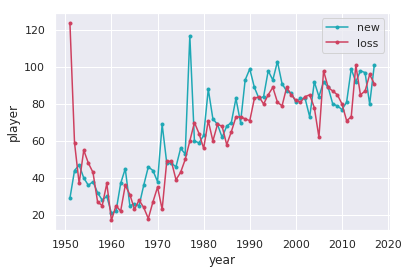

In [5]:
# NBA全体で新たに出現するノード数と消失するノード数をプロット

x = "year"
years_1 = [i for i in range(1951, 2018)]

y1 = "new"
new_player = []
for year in years_1:
    diff = new_node(graph[year-1]['nodes'], graph[year]['nodes'])
    new_player.append(diff)

y2 = "loss"
loss_player = []
for year in years_1:
    diff = loss_node(graph[year-1]['nodes'], graph[year]['nodes'])
    loss_player.append(diff)

history = {x:years_1, y1:new_player, y2:loss_player}
plot_history2(history, x, y1, y2, title="", ylabel="player")

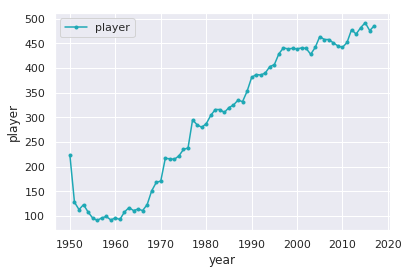

In [6]:
# NBA全体の競技人口をプロット
x = "year"
years = [i for i in range(1950, 2018)]

y = "player"
num_player = []
for year in years:
    num_player.append(len(graph[year]['nodes']))

history = {x:years, y:num_player}
plot_history(history, x, y, title="")

In [7]:
# graphデータ構造をチームでグルーピング

activeteam = ['ATL', 'BRK', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHO', 'PHI', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']

# graph per team
graph_tm = {}
for tm in activeteam:
    graph_tm[tm] = {}
    for year in years:
        graph_tm[tm][year] = {}
        for name, attribute in graph[year]['nodes'].items():
            if attribute["Tm"] == tm:
                graph_tm[tm][year][name] = graph[year]['nodes'][name]

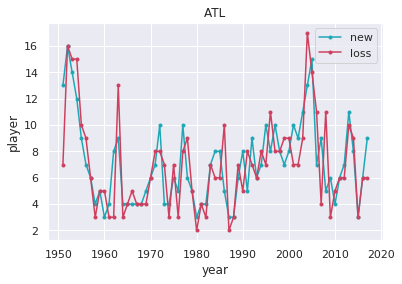

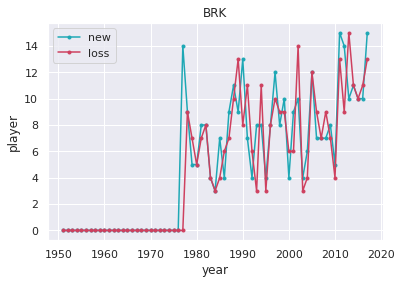

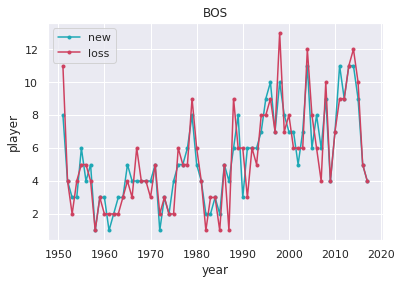

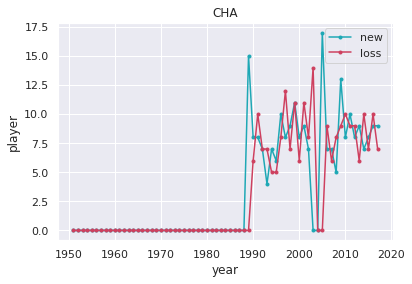

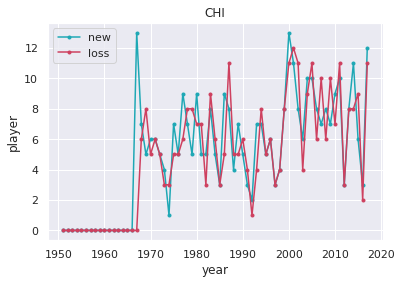

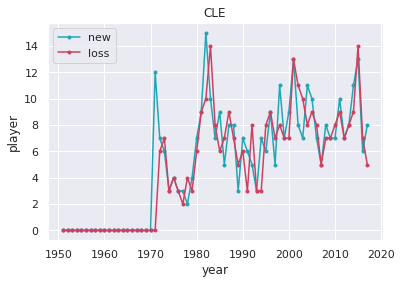

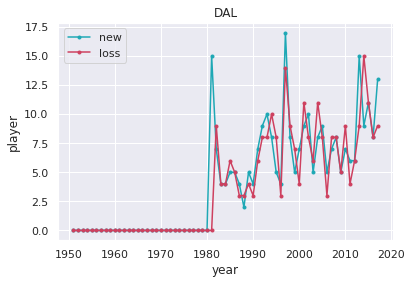

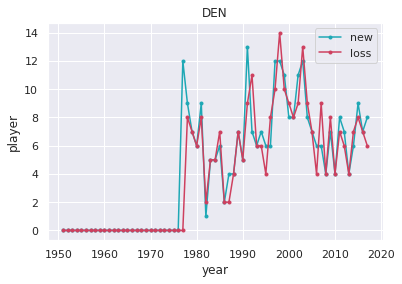

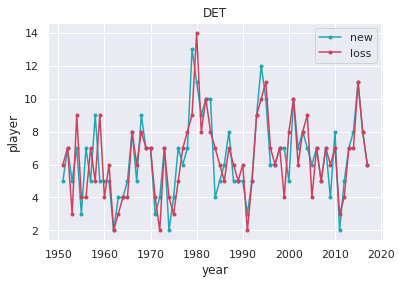

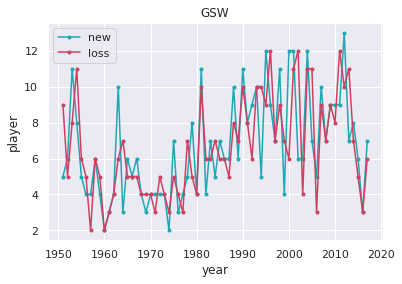

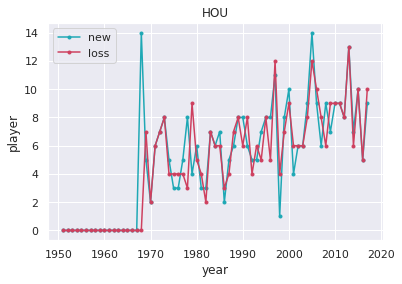

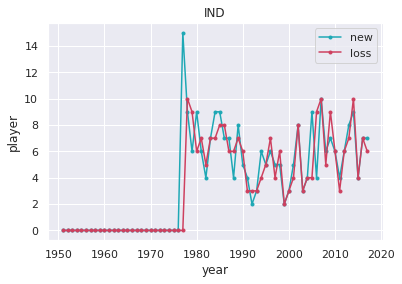

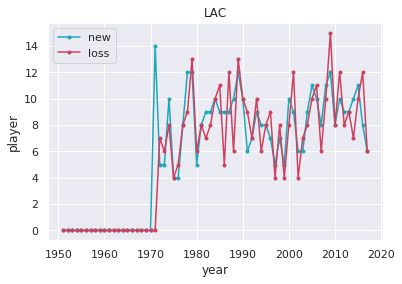

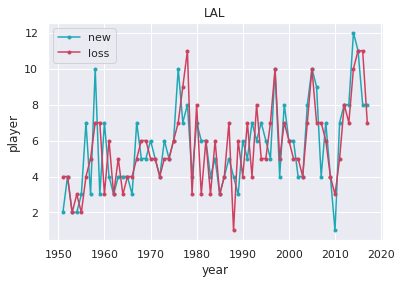

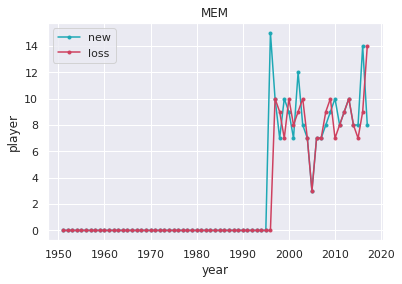

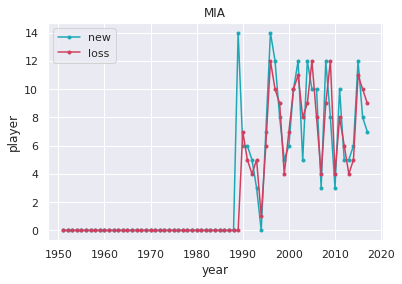

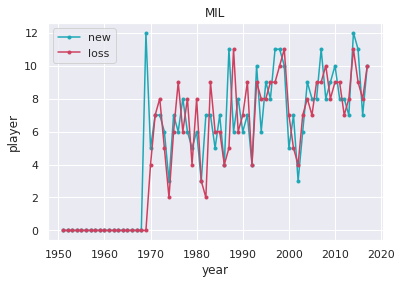

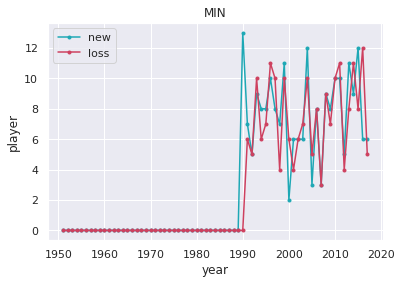

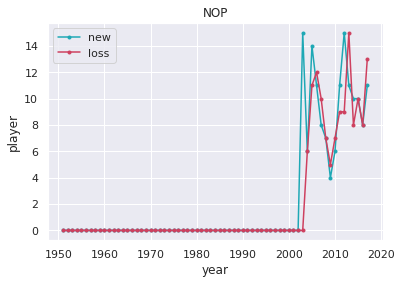

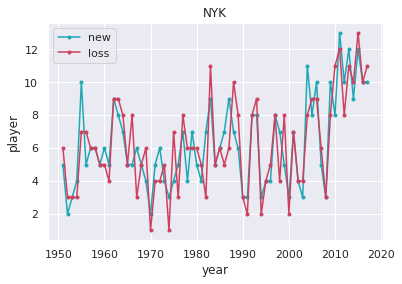

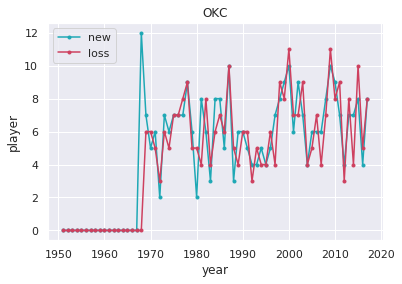

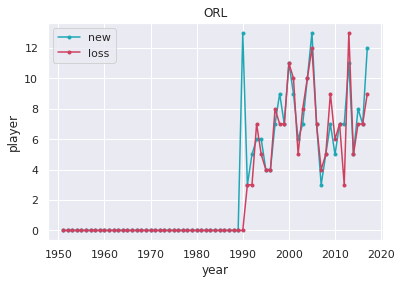

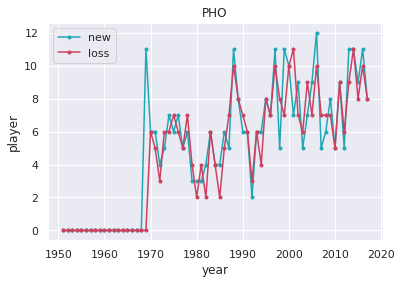

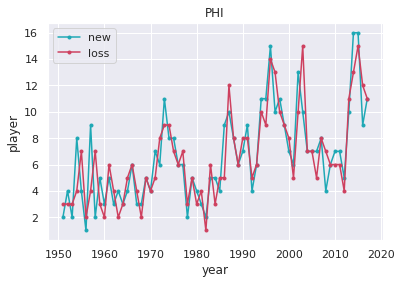

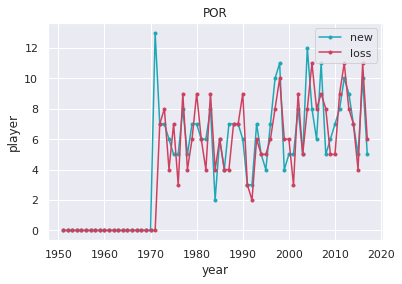

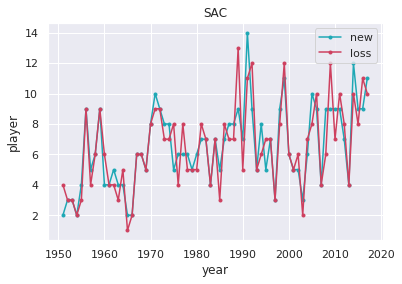

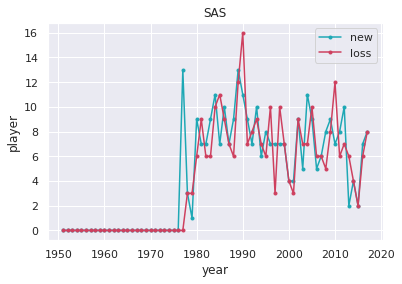

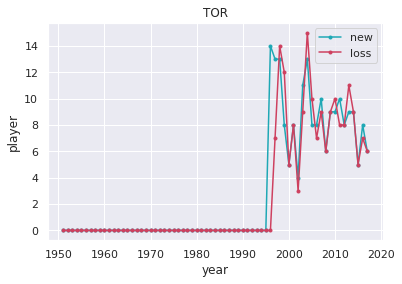

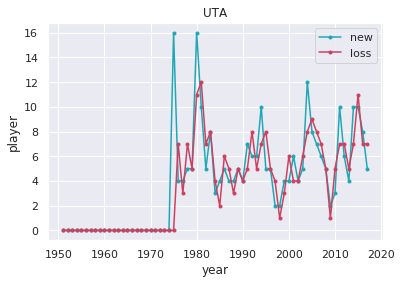

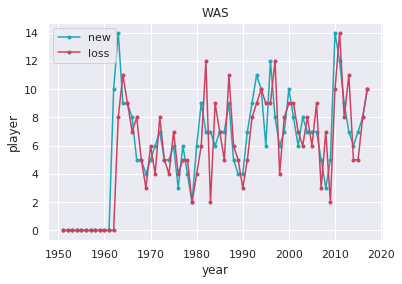

In [8]:
# 新たに出現するノード数と消失するノード数をチームごとにプロット
x = "year"
years_1 = [i for i in range(1951, 2018)]

for tm, graph in graph_tm.items():
    y1 = "new"
    new_player = []
    
    for year in years_1:
        diff = new_node(graph[year-1], graph[year])
        new_player.append(diff)
    
    y2 = "loss"
    loss_player = []
    for year in years_1:
        diff = loss_node(graph[year-1], graph[year])
        loss_player.append(diff)
    
    history = {x:years_1, y1:new_player, y2:loss_player}
    plot_history2(history, x, y1, y2, title=tm, ylabel="player")

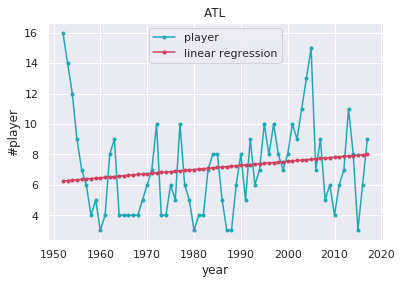

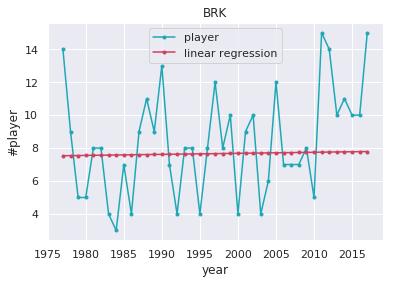

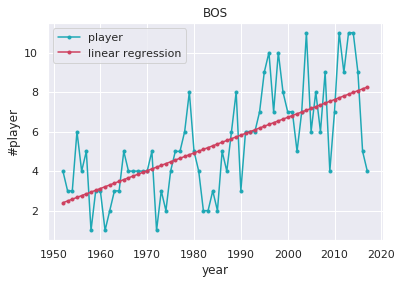

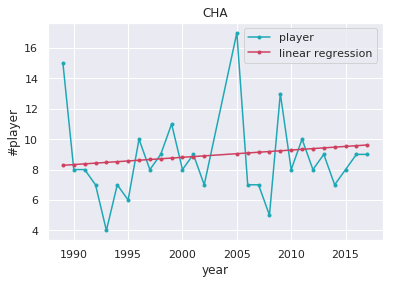

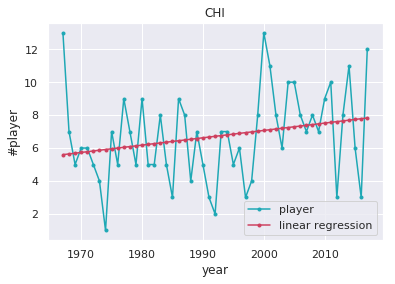

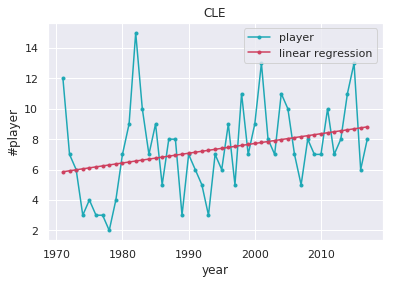

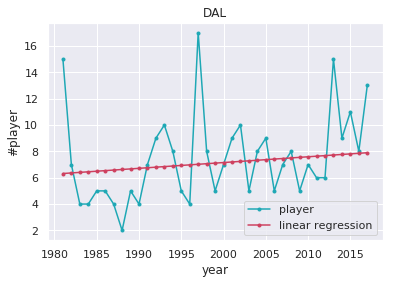

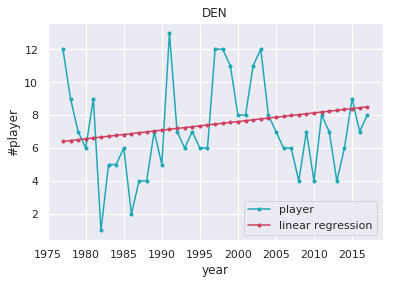

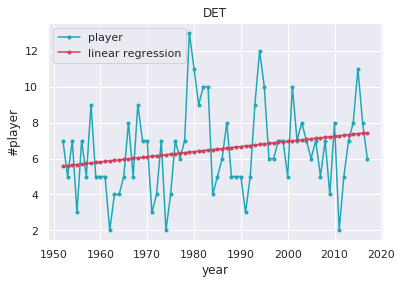

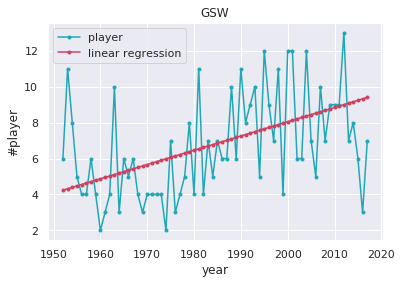

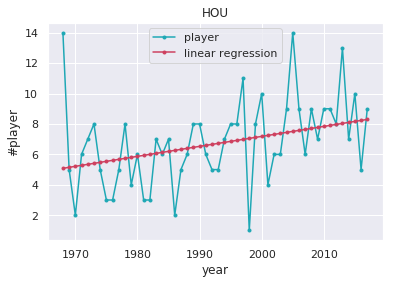

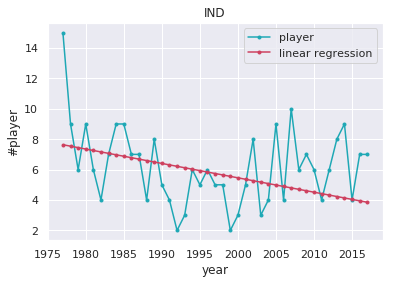

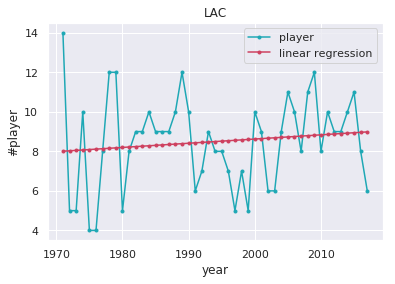

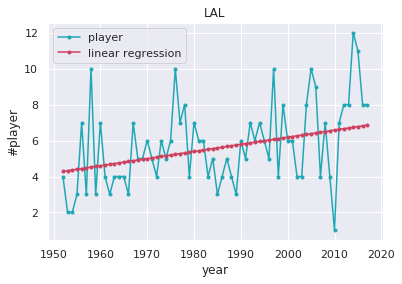

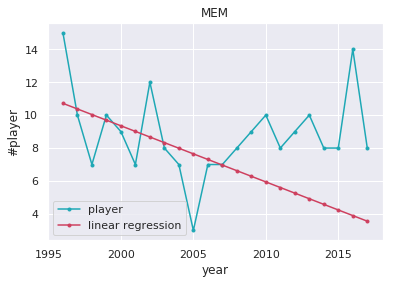

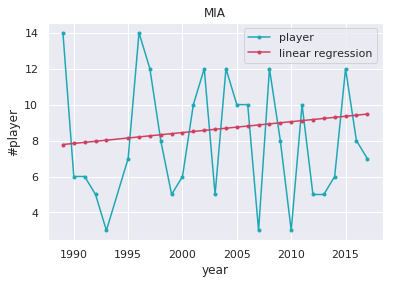

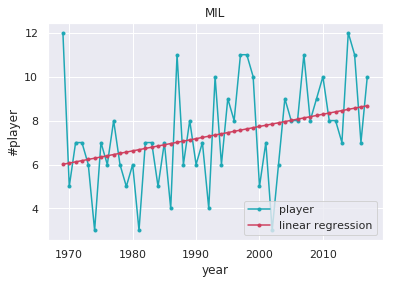

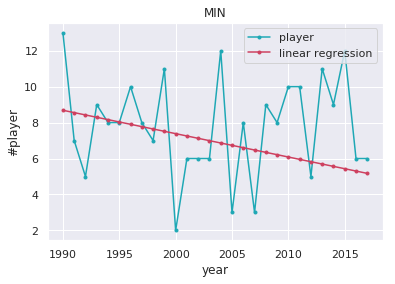

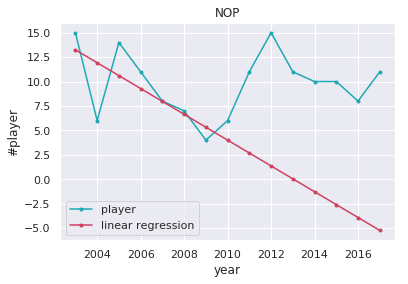

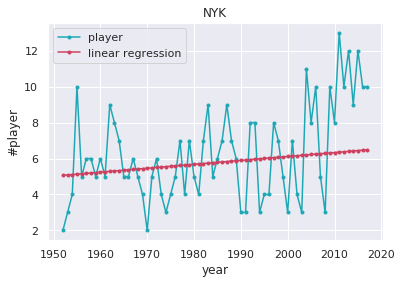

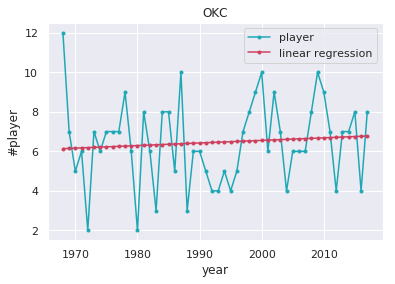

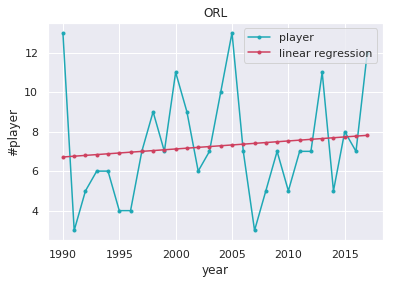

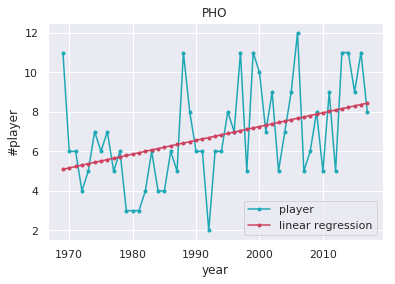

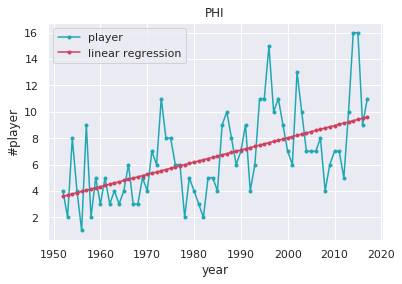

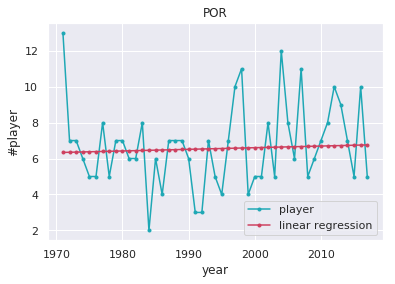

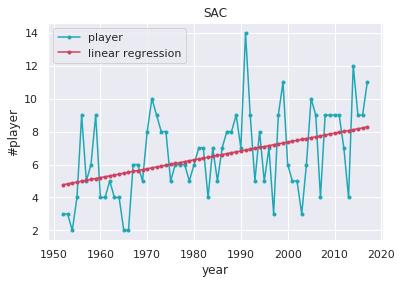

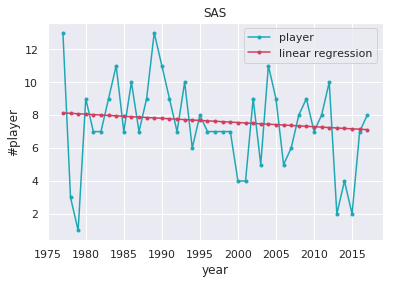

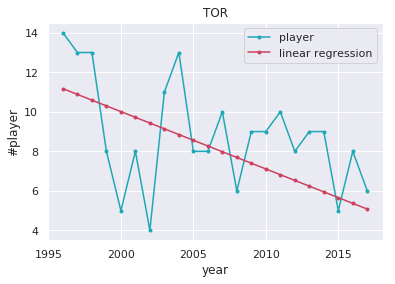

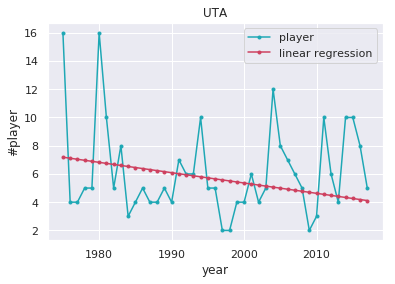

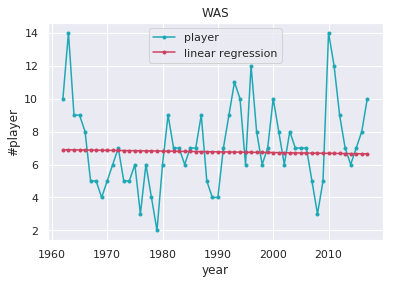

MAE 2.6972856862992605
MSE 13.409569656192652
RMSE 3.6619079256847313


In [9]:
# 2010 - 2017に出現するノード数を予測

x = "year"
years_1 = [i for i in range(1952, 2010)] # 訓練期間
target = [i for i in range(2010, 2018)] # 予測期間
years = [i for i in range(1952, 2018)] # 比較用

team_ls = []
pred_ls = []
true_ls = []
for tm, graph in graph_tm.items():

    # 比較用
    y1 = "player"
    new_player_1 = []
    years_2 = [] # チームが存在する年のみ扱う(全体)
    for year in years:
        diff = new_node(graph[year-1], graph[year])
        if diff != 0:
            new_player_1.append(diff)
            years_2.append(year)

            
    # 訓練用
    y2 = "linear regression"
    new_player_2 = []
    years_3 = [] # チームが存在する年のみ扱う(訓練期間)
    for year in years_1:
        diff = new_node(graph[year-1], graph[year])
        if diff != 0:
            new_player_2.append(float(diff))
            years_3.append(float(year))

    X = pd.DataFrame(years_3)
    Y = pd.DataFrame(new_player_2)
        
    model =linear_model.LinearRegression()
    model.fit(X, Y)

    # 予測 (予測期間は2010から2017であるが、確認用として全ての年にモデルを適用)
    px = np.array(years_2)[:,np.newaxis] # sklearnの仕様のため二次元numpy配列に変換
    py = model.predict(px)
    py = py.reshape(-1).tolist()
        
    history = {x:years_2, y1:new_player_1, y2:py}
    plot_history2(history, x, y1, y2, title=tm, ylabel="#player")
        
    for i in range(len(target)):
        true_ls.append(new_player_1[-1-i])
        pred_ls.append(py[-1-i])
        team_ls.append(tm)

print("MAE", mean_absolute_error(true_ls, pred_ls))
print("MSE", mean_squared_error(true_ls, pred_ls))
print("RMSE", np.sqrt(mean_squared_error(true_ls, pred_ls)))
result = pd.DataFrame({'team' : team_ls, 'true' : true_ls, 'pred' : pred_ls})
result = result.set_index('team')
result.to_csv(outputDir + "/1/LinearRegression/LinearRegression.csv")

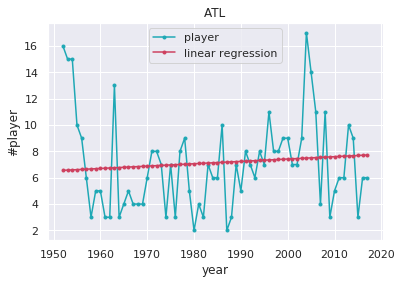

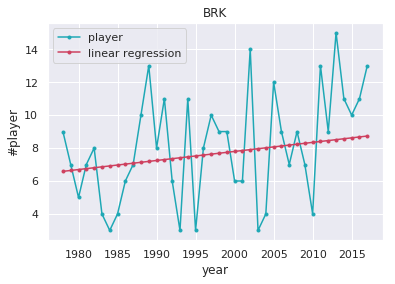

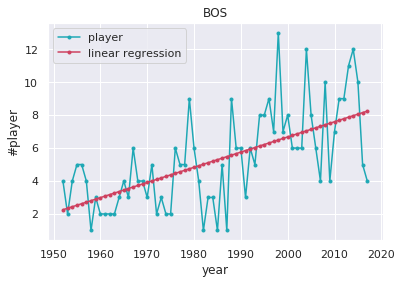

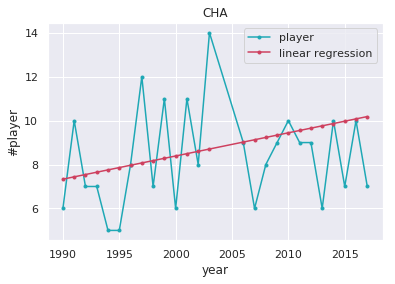

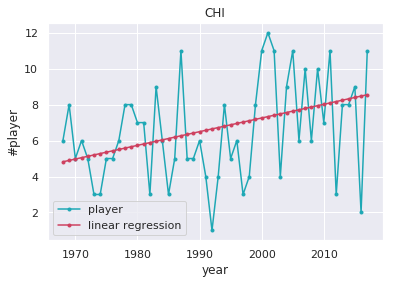

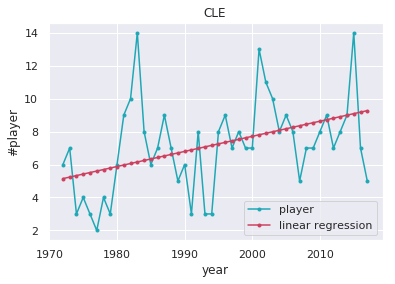

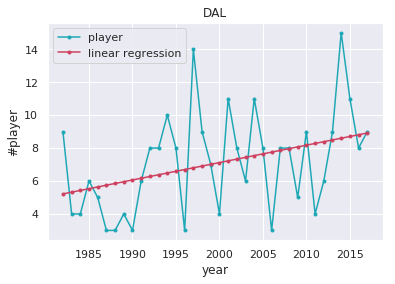

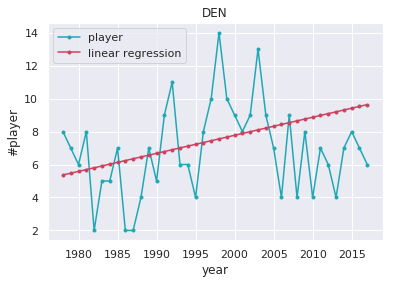

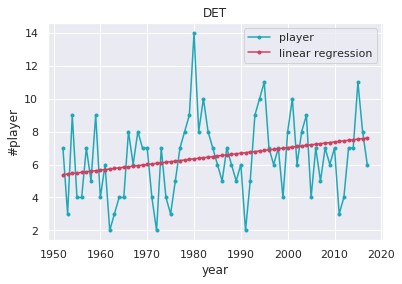

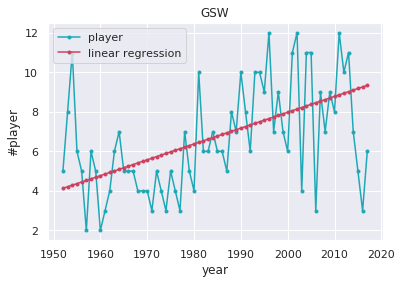

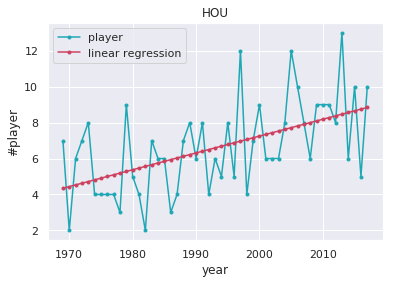

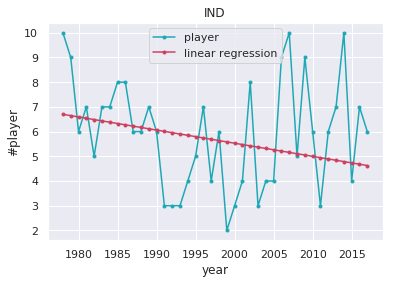

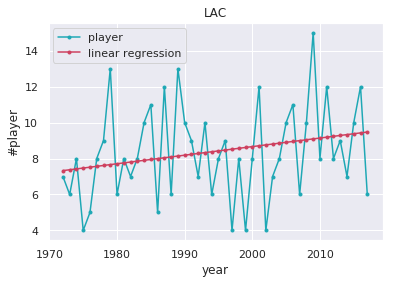

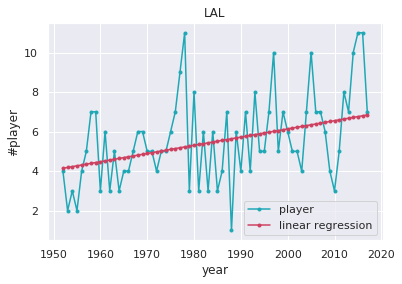

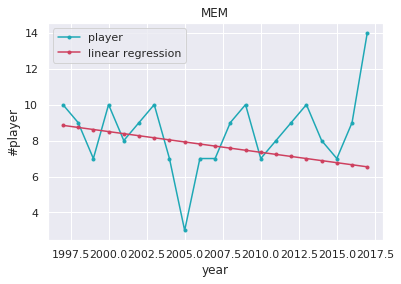

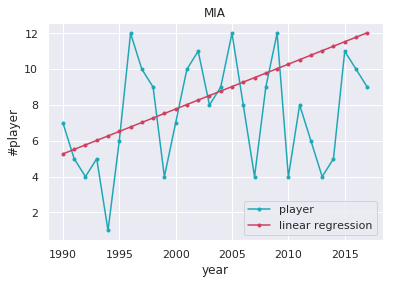

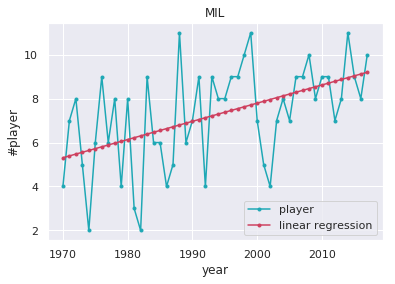

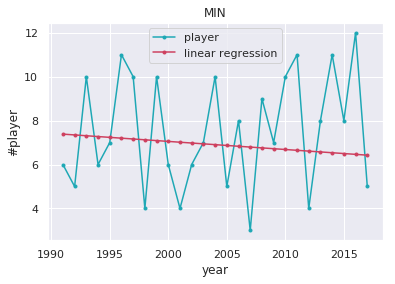

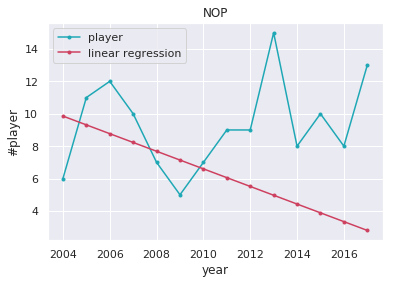

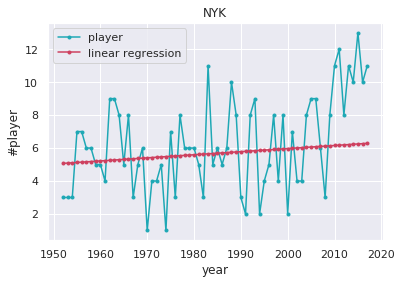

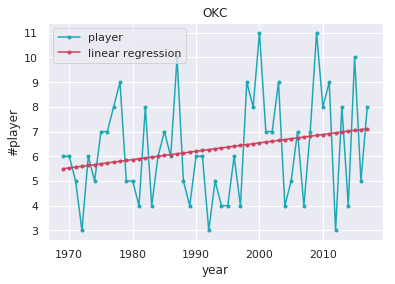

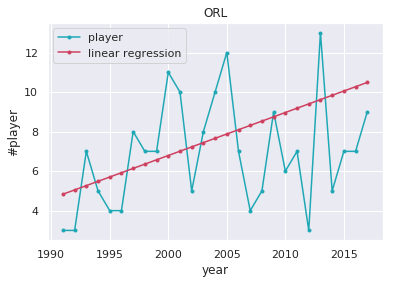

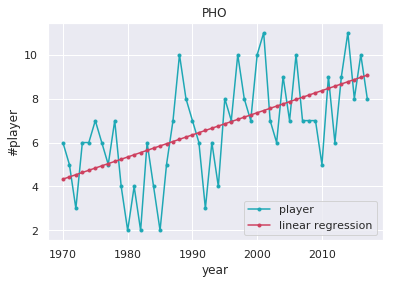

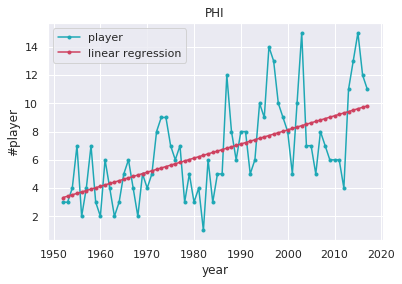

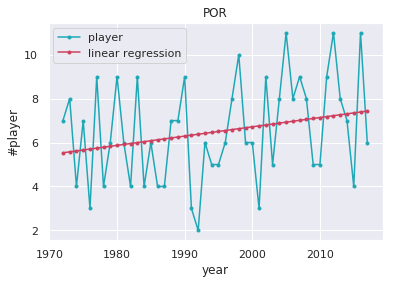

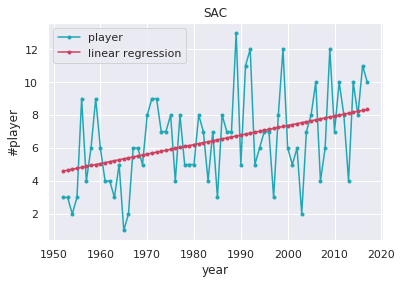

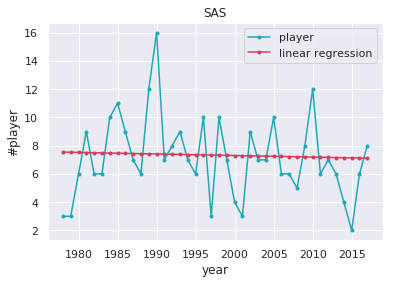

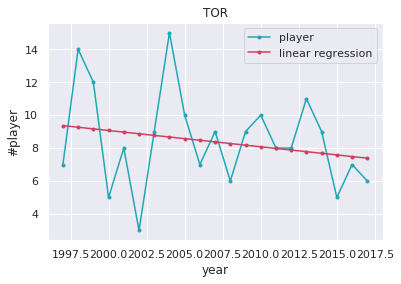

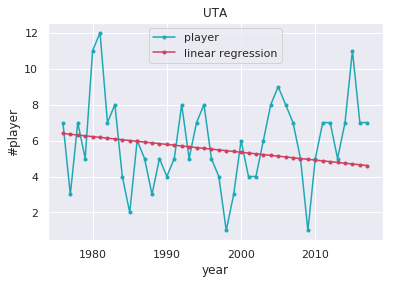

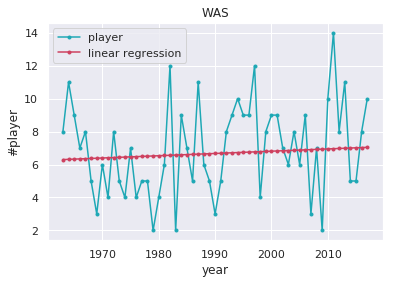

MAE 2.482351477683203
MSE 9.67158259600381
RMSE 3.109916814965283


In [10]:
# 2010 - 2017に消失するノード数を予測

x = "year"
years_1 = [i for i in range(1952, 2010)] # 訓練期間
target = [i for i in range(2010, 2018)] # 予測期間
years = [i for i in range(1952, 2018)] # 比較用

team_ls = []
pred_ls = []
true_ls = []
for tm, graph in graph_tm.items():

    # 比較用
    y1 = "player"
    loss_player_1 = []
    years_2 = [] # チームが存在する年のみ扱う(全体)
    for year in years:
        diff = loss_node(graph[year-1], graph[year])
        if diff != 0:
            loss_player_1.append(diff)
            years_2.append(year)

            
    # 訓練用
    y2 = "linear regression"
    loss_player_2 = []
    years_3 = [] # チームが存在する年のみ扱う(訓練期間)
    for year in years_1:
        diff = loss_node(graph[year-1], graph[year])
        if diff != 0:
            loss_player_2.append(float(diff))
            years_3.append(float(year))

    X = pd.DataFrame(years_3)
    Y = pd.DataFrame(loss_player_2)
        
    model =linear_model.LinearRegression()
    model.fit(X, Y)

    # 予測 (予測期間は2010から2017であるが、確認用として全ての年にモデルを適用)
    px = np.array(years_2)[:,np.newaxis] # sklearnの仕様のため二次元numpy配列に変換
    py = model.predict(px)
    py = py.reshape(-1).tolist()
        
    history = {x:years_2, y1:loss_player_1, y2:py}
    plot_history2(history, x, y1, y2, title=tm, ylabel="#player")
        
    for i in range(len(target)):
        true_ls.append(loss_player_1[-1-i])
        pred_ls.append(py[-1-i])
        team_ls.append(tm)

print("MAE", mean_absolute_error(true_ls, pred_ls))
print("MSE", mean_squared_error(true_ls, pred_ls))
print("RMSE", np.sqrt(mean_squared_error(true_ls, pred_ls)))
result = pd.DataFrame({'team' : team_ls, 'true' : true_ls, 'pred' : pred_ls})
result = result.set_index('team')
result.to_csv(outputDir + "/2/LinearRegression/LinearRegression.csv")